In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyclust)
library(GGally)
library(infer)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

INTRO:
 In the last few years the increased popularity of Sandbox games like MineCraft gave researchers the chance to observe the behaviour of users in an immersive virtual environment. This projectanalyzes a set of logs gathered by a MineCraft server, which was operated by the computer science department at the University of British Columbia (UBC). The logs provide a rich set of information about users activities and properties, creating a real-world dataset to analyze the pattern of behaviour of users and predicting the outcome. The project was created based on the needs of the research group to see how they would be able to allocate the resources to users effectively, recruit them accordingly and ensure high peak usage. In order to do so, this project uses statistical and other common methods in data science to find useful insights in the dataset and answer the questions that they have.

My question that i decided to tackle directly was what time of the day lead to the longest play sessions and , what time windows are most likely to have a large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability.

METHODS:


107/800 Words

Humanize
Check for AI
I first cleaned the session data by converting the start and end time columns to datetime type using dmy_hm(). I also extracted the date from the start time column and removed the original start and end time columns. I then grouped the data by date to count the number of sessions per day and extracted the month of the session for each day. Finally, I used ggplot2 to create a line plot showing the number of players on at the same time each day for each month.

In [23]:
sessions <- read_csv("Data/sessions.csv")
players <- read_csv("Data/players.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,duration_minutes,date,count,month
<chr>,<dttm>,<dttm>,<dbl>,<date>,<int>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12,2024-06-30,23,6
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13,2024-06-17,27,6
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23,2024-07-25,38,7
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36,2024-07-25,38,7
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11,2024-05-25,14,5
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,122,2024-06-23,11,6
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,9,2024-04-15,10,4
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,17,2024-09-21,5,9
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,18,2024-06-21,12,6


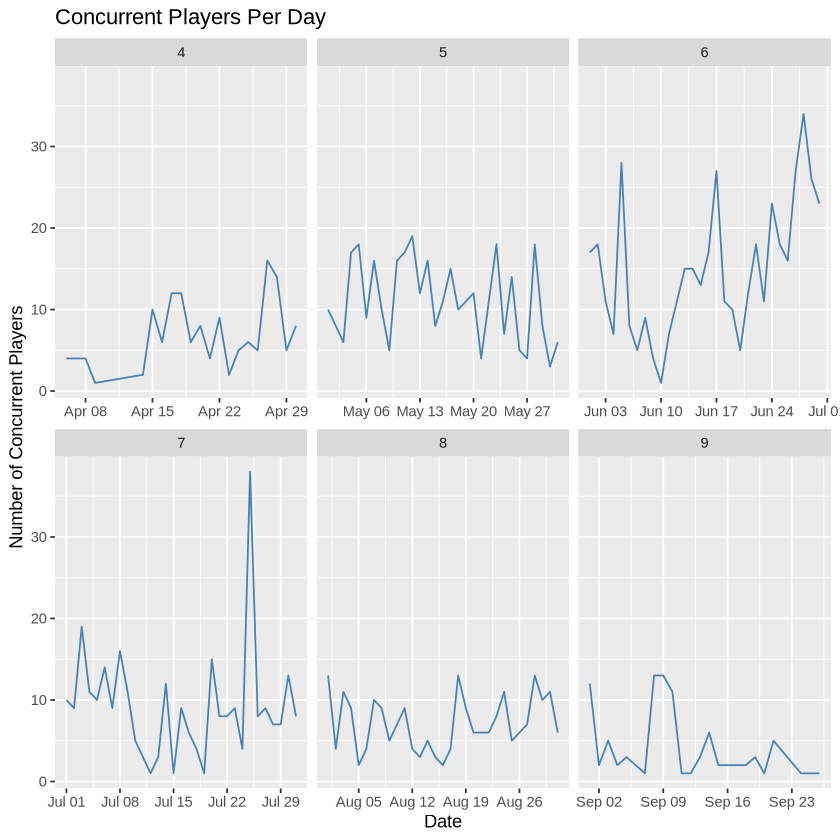

In [49]:


sessions_clean <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")),
    date = as_date(start_time)
  ) |>
  select(-original_start_time, -original_end_time) 

sessions_count <- sessions_clean |> group_by(date) |> mutate(count = n(), month = month(date))
sessions_count

ggplot(sessions_count, aes(x = date, y = count)) +
 geom_line(color = "steelblue") +
  labs(
    title = "Concurrent Players Per Day",
    x = "Date",
    y = "Number of Concurrent Players") +
    facet_wrap(~ month, scales = "free_x")
    
